<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/VEBET_Ders_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    Graph formatting

plt.rcParams['font.size'] = 10

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2]:
df = pd.read_csv( '/content/Auto(ogrenci).csv' ).iloc[:,1:]

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,NaN,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick
2,18.0,8.0,318.0,150.0,NaN,11.0,70.0,NaN,plymouth
3,16.0,8.0,NaN,NaN,3433.0,NaN,70.0,1.0,amc
4,17.0,8.0,302.0,NaN,3449.0,10.5,70.0,NaN,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,NaN,2790.0,15.6,82.0,1.0,ford
393,44.0,4.0,97.0,NaN,2130.0,NaN,82.0,2.0,volkswagen
394,32.0,4.0,NaN,84.0,2295.0,11.6,82.0,1.0,dodge
395,28.0,NaN,120.0,NaN,2625.0,18.6,82.0,NaN,ford


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,324.0,23.622222,7.762540,10.0,17.9,23.0,28.85,46.6
cylinders,313.0,5.456869,1.718739,3.0,4.0,4.0,8.00,8.0
displacement,308.0,189.910714,105.181630,68.0,98.0,140.0,258.00,455.0
horsepower,303.0,103.313531,39.530155,46.0,75.0,90.0,120.00,230.0
weight,327.0,2962.605505,857.953239,1613.0,2224.5,2745.0,3607.00,5140.0
acceleration,318.0,15.522013,2.750249,8.0,14.0,15.4,17.00,24.8
year,321.0,76.046729,3.688792,70.0,73.0,76.0,79.00,82.0
origin,327.0,1.577982,0.802147,1.0,1.0,1.0,2.00,3.0


In [4]:
#. df'nin içinde boş veri olmayan kısmı
dff = df.dropna( axis = 0, how = 'any' )
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac
10,15.0,8.0,383.0,170.0,3563.0,10.0,70.0,1.0,dodge
21,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi
23,26.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0,bmw
24,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0,amc
...,...,...,...,...,...,...,...,...,...
354,34.5,4.0,100.0,79.0,2320.0,15.8,81.0,2.0,renault
364,26.6,8.0,350.0,105.0,3725.0,19.0,81.0,1.0,oldsmobile
368,27.0,4.0,112.0,88.0,2640.0,18.6,82.0,1.0,chevrolet
370,31.0,4.0,112.0,85.0,2575.0,16.2,82.0,1.0,pontiac


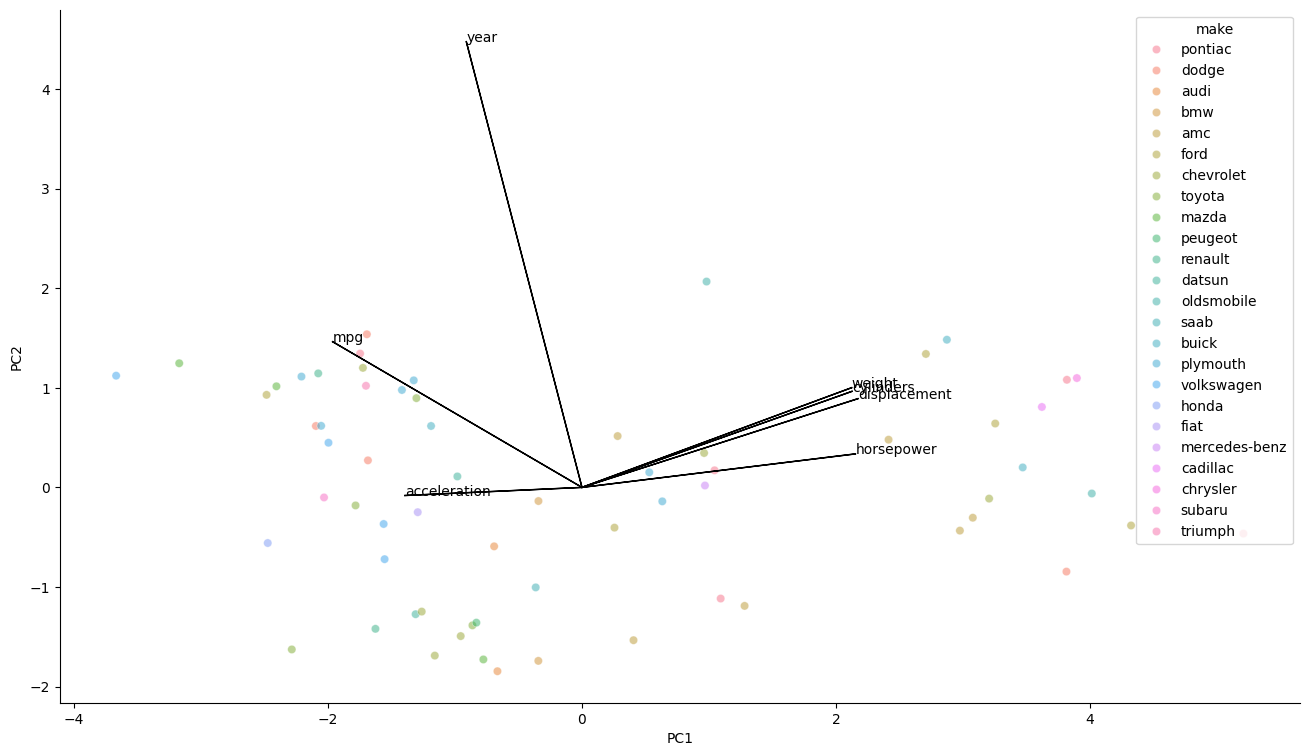

In [5]:
#. Data Visualization (PCA with feature vectors)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=True,
                        with_mean=True,)
df_scaled = scaler.fit_transform(dff.iloc[:,:-2])

pca = PCA()
pca.fit(df_scaled)

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax = sns.scatterplot(
                    x = pca.transform(df_scaled)[:,0],
                    y= pca.transform(df_scaled)[:,1],
                    alpha = .5,
                    # color = 'red',
                    # hue = dff.origin,
                    hue = dff.make,
                    )

ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for k in range(pca.components_.shape[1]):
  if k != 5:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            df.columns[k])
  else:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            df.columns[k])

plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 300

#. Eksik Veri Tamamlama Yaklaşımları:
##. Betimsel İstatistik Kullanma Yöntemi

İlk 7 sütunum sürekli değişkenlerden oluşuyor ve bu sütunlardaki eksik veriyi tamamlmak için ortalama kullanılabilir.

Son 2 sütunum kategorik değişkenlerden oluşuyor ve bu değer için sayısal etiketler tanımlanmış bile olsa bunların büyüklükleri (değerleri) hiçbir ek mesaj içermiyor.

Bu nedenle son iki sütundaki eksik veriyi tamamlamak adına ortalama kullanılamaz, mod kullanılabilir.

In [6]:
#. mpg verisindeki eksik değerleri ortalama ile tamamlamak

#.   mpg verisinin ortalama ve standart sapması
df.mpg.mean(), df.mpg.std()

(np.float64(23.622222222222224), 7.7625400394314985)

<Axes: xlabel='mpg', ylabel='Count'>

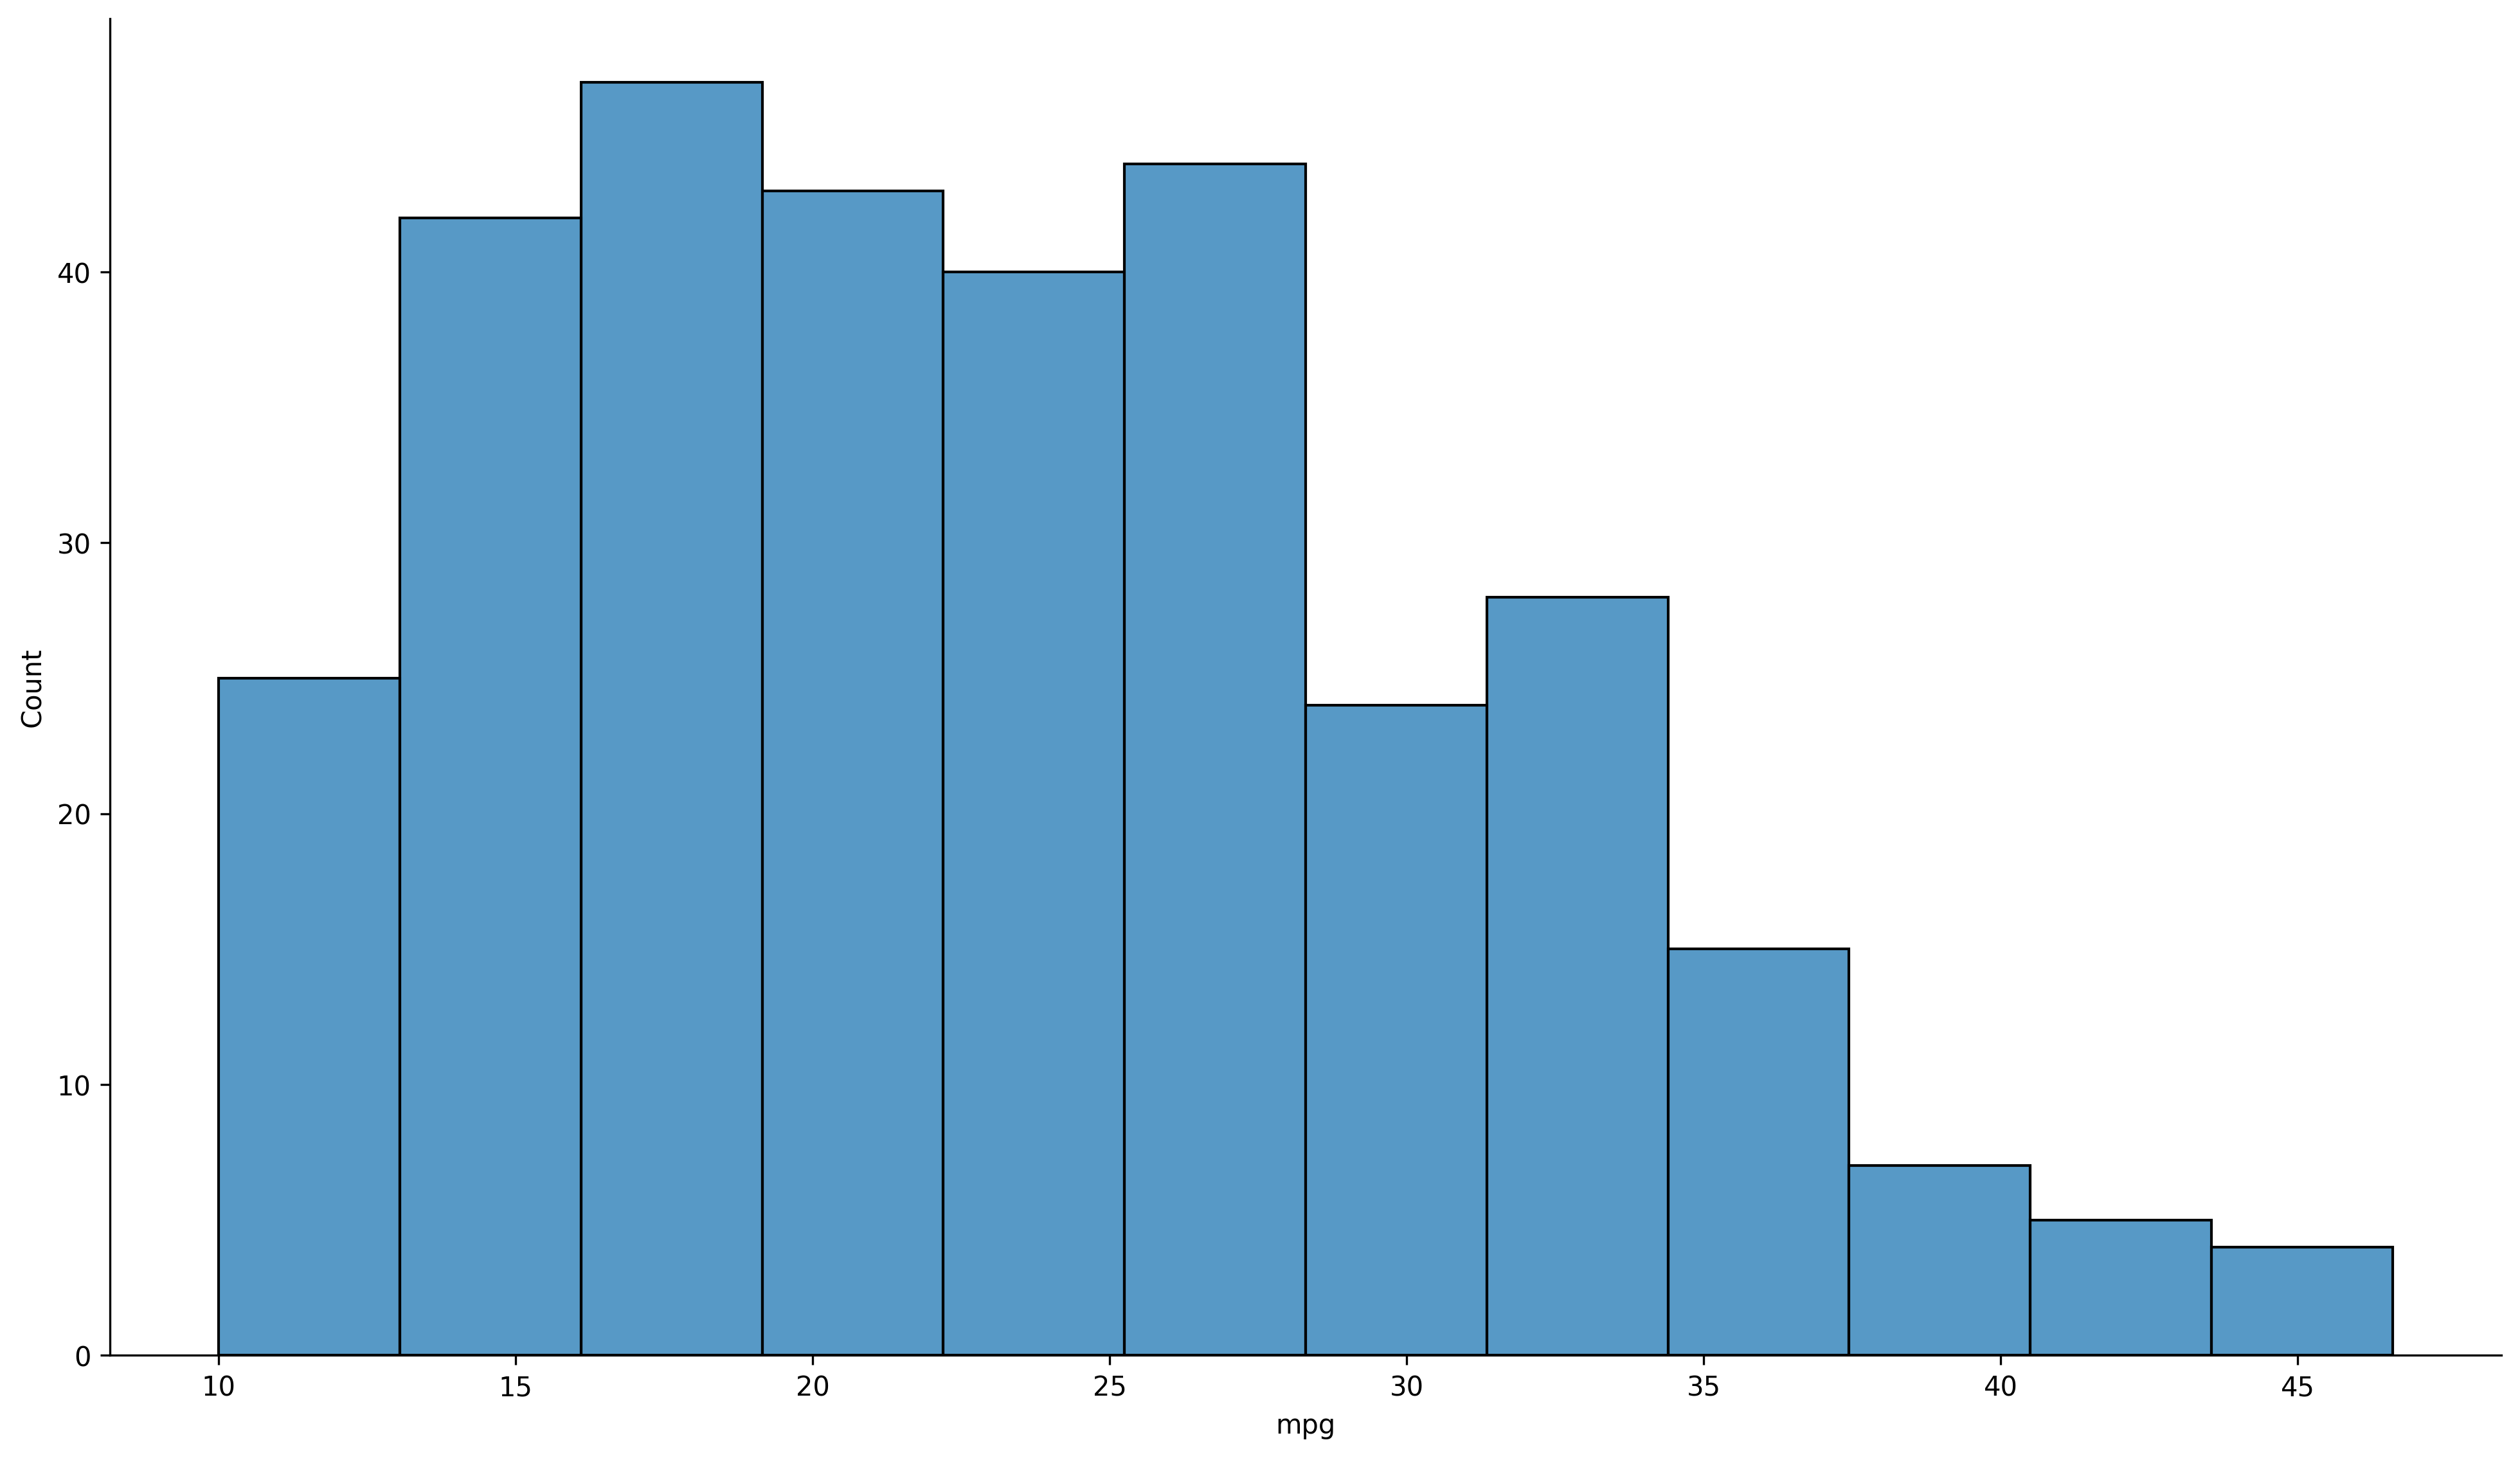

In [7]:
#. mpg verisinin histogramı
sns.histplot(df.mpg)

<Axes: xlabel='mpg', ylabel='Count'>

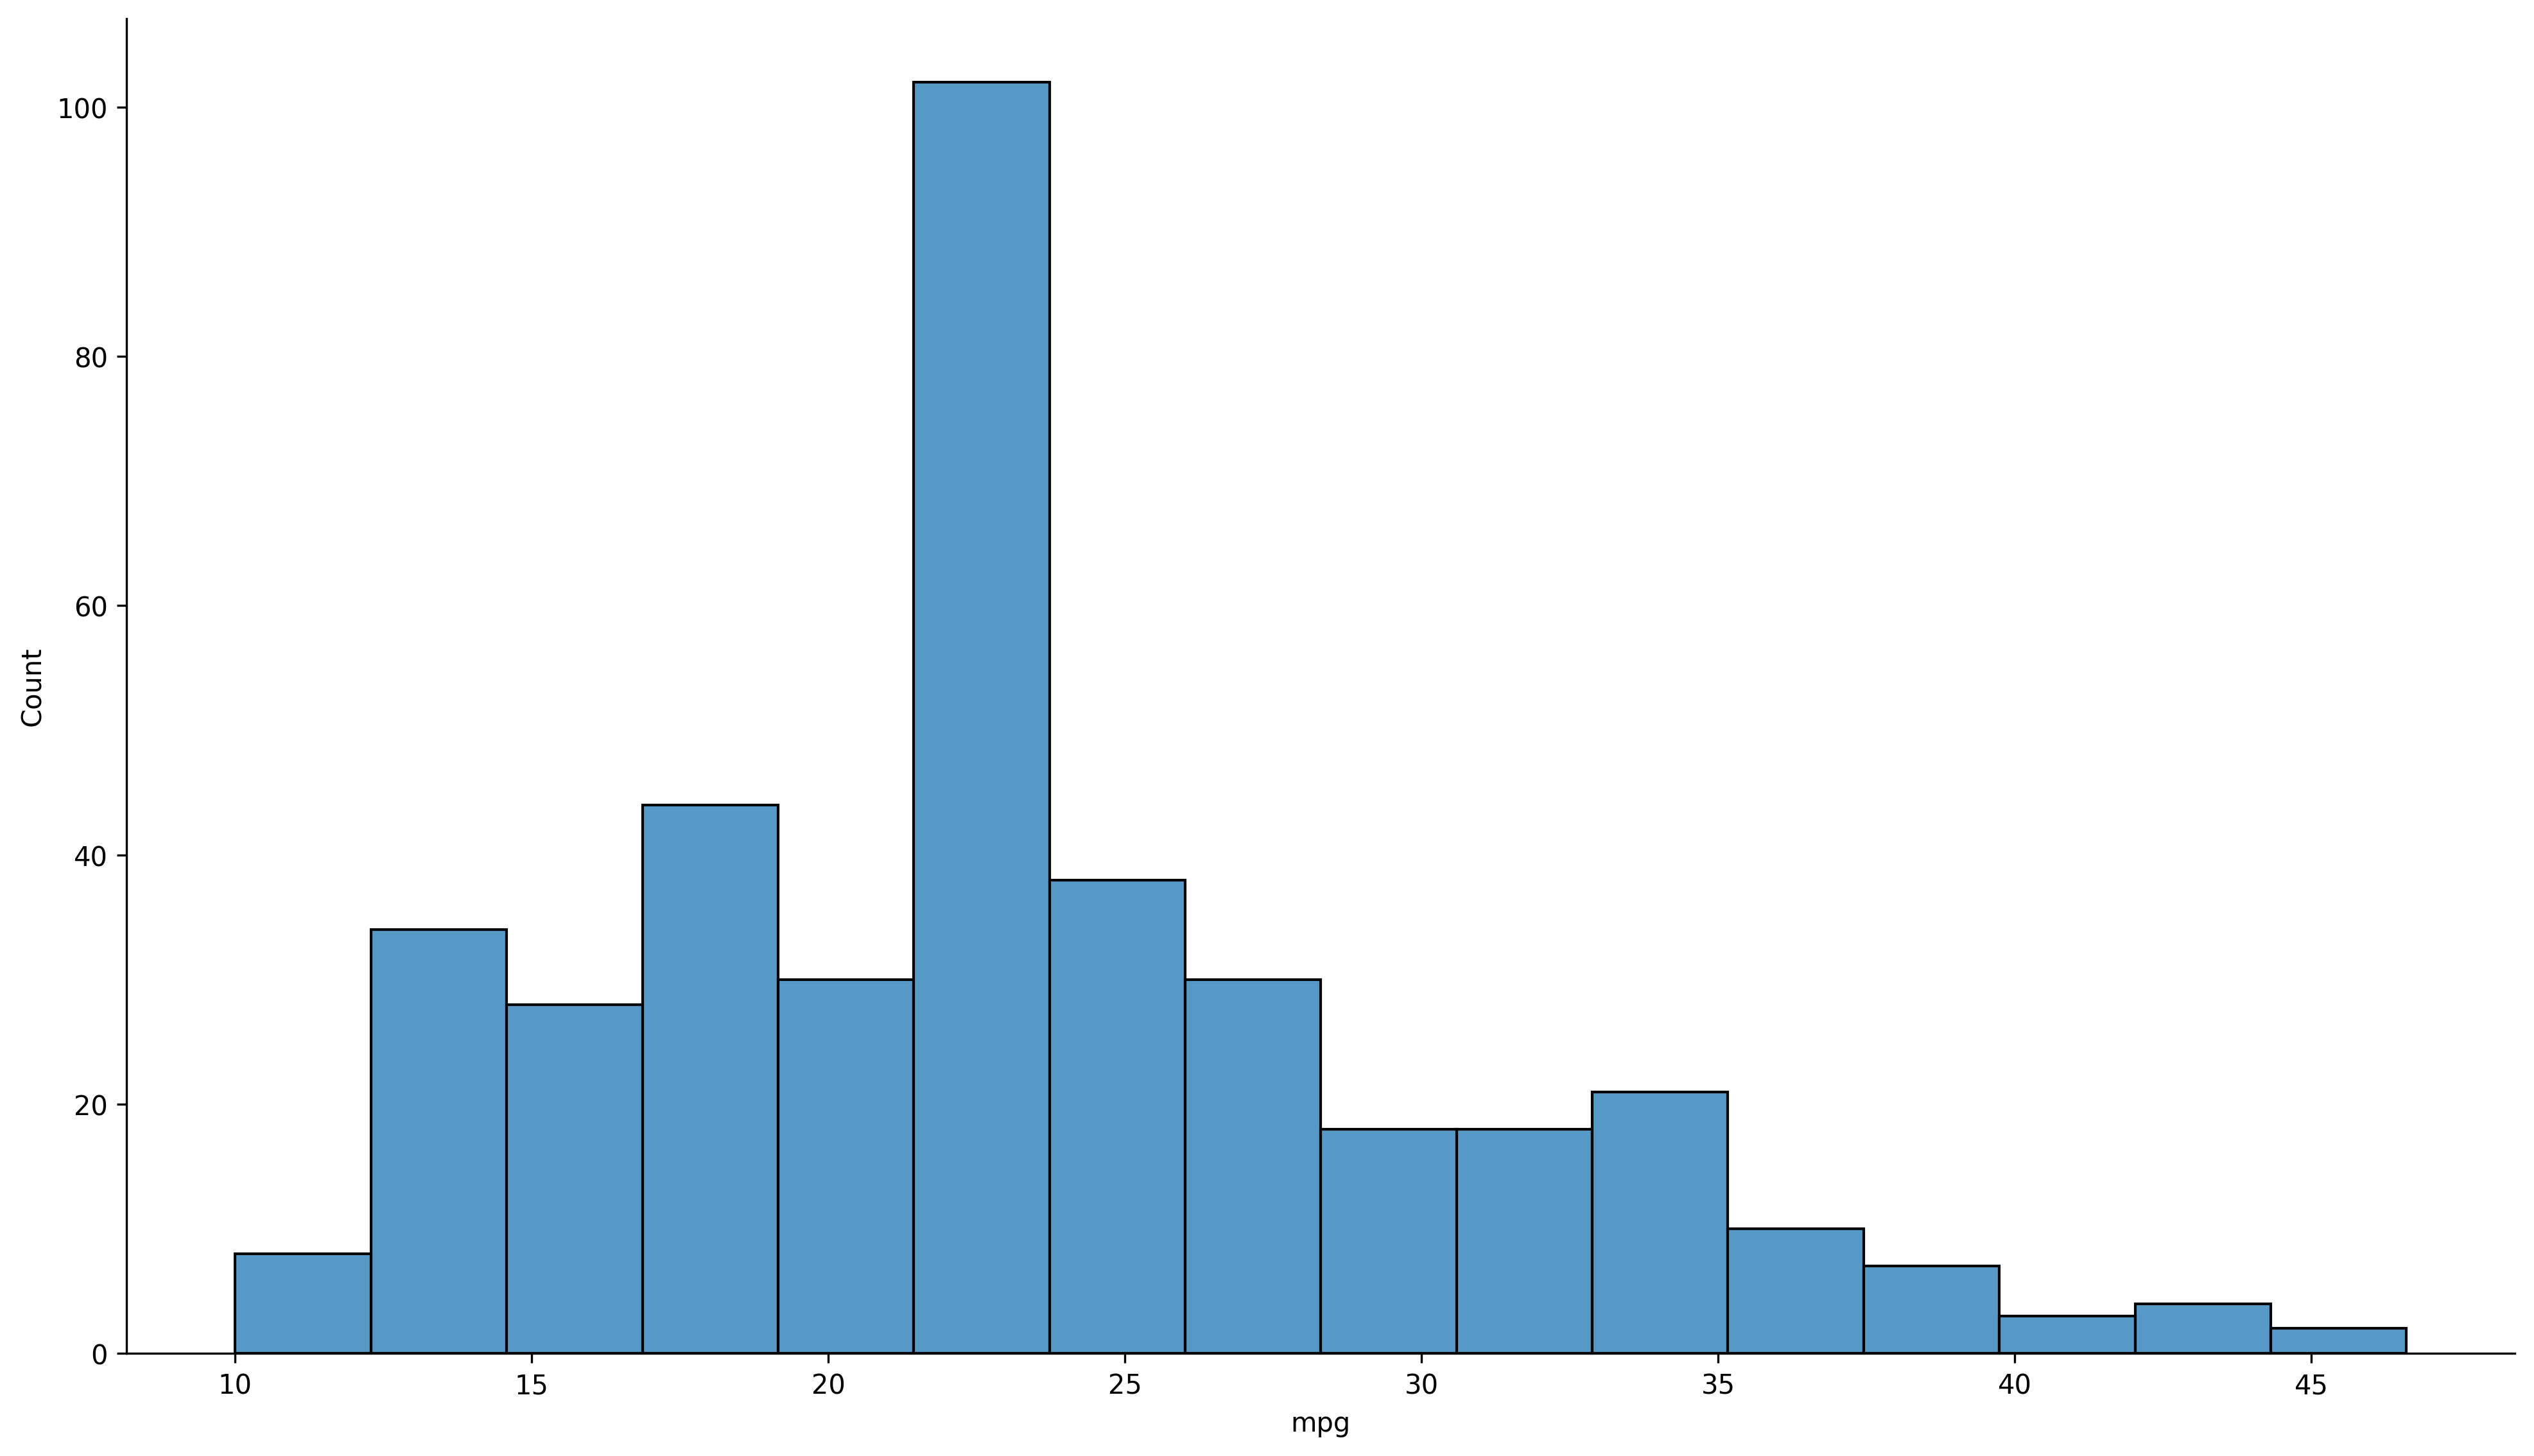

In [8]:
#.   ortalama ile tamamlama

sns.histplot(
            df.mpg.fillna(
                          value = df.mpg.mean(), # ortalama ile boş veri değerlerini doldur
                          )
            )

In [9]:
abs( df.iloc[:,:-2].corr() )

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,0.750685,0.768718,0.754497,0.820428,0.392811,0.552926
cylinders,0.750685,1.000000,0.947934,0.829989,0.898175,0.470505,0.350927
displacement,0.768718,0.947934,1.000000,0.893592,0.925932,0.548411,0.351260
horsepower,0.754497,0.829989,0.893592,1.000000,0.858240,0.671371,0.390421
weight,0.820428,0.898175,0.925932,0.858240,1.000000,0.446805,0.318563
acceleration,0.392811,0.470505,0.548411,0.671371,0.446805,1.000000,0.263210
year,0.552926,0.350927,0.351260,0.390421,0.318563,0.263210,1.000000


Türkiye'den rassal seçilen bir bireyin bana boyu soruldu. 168 cm olarak tahminledim. Bu bireyin erkek olduğu iletildi; tahminimi 174 cm olarak güncelledim. Bireyin doğum yerinin Mardin olduğu söylendi; tahminimi 182 cm olarak güncelldim.

Yukarıdaki örnek naif tahmin değerinden; ek bilgiden yararlanılarak gerçekleştirilen rafine etme sürecini gösteriyor. Bu rafine etme süreci; genel tahmin yerine sunulan alt kümeler içerisindeki tahminlere dayanılarak yapıldı.

Bu yaklaşımın benzeri bilmediğim veri başlığı ile en yüksek korelasyona sahip değerler cinsinden benzerlik ilişikileri ile de yapılabilir. Şimdi mpg'ye en yakın veri başlığı ile başlayark bir eksik veri tamamlama algoritması yazıyoruz.

In [10]:
#. mpg ile korele başlıklar listesi

abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index

Index(['mpg', 'weight', 'displacement', 'horsepower', 'cylinders', 'year',
       'acceleration'],
      dtype='object')

In [11]:
#. bu listede mpg de var onu çıkarıyorum

abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index[1:]

Index(['weight', 'displacement', 'horsepower', 'cylinders', 'year',
       'acceleration'],
      dtype='object')

In [12]:
for başlık in abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index[1:]:

  #. kaç standart sapma uzaklağındakiler benzerdir?
  #. bence 0.5 olsun...
  std = .25

  #. mpg verisi eksik satır başlık için başlıyorum:
  for satır in df[ df.mpg.isnull() ].index:
    if not df[başlık].iloc[ satır ].isnull:

      #. ilgili satırda weight değeri nedir?
      w = df[başlık].iloc[ satır ]
      #. weight için standart sapma nedir?
      s = df[başlık].std() * .5

      #. alt kümemi tanımlıyorum
      df.mpg.iloc[ satır ] = \
      df[ (df[başlık] <= df[başlık].iloc[ satır ] + df[başlık].std() * std) & \
          (df[başlık] >= df[başlık].iloc[ satır ] - df[başlık].std() * std) ].mpg.mean()

AttributeError: 'numpy.float64' object has no attribute 'isnull'

<Axes: xlabel='mpg', ylabel='Count'>

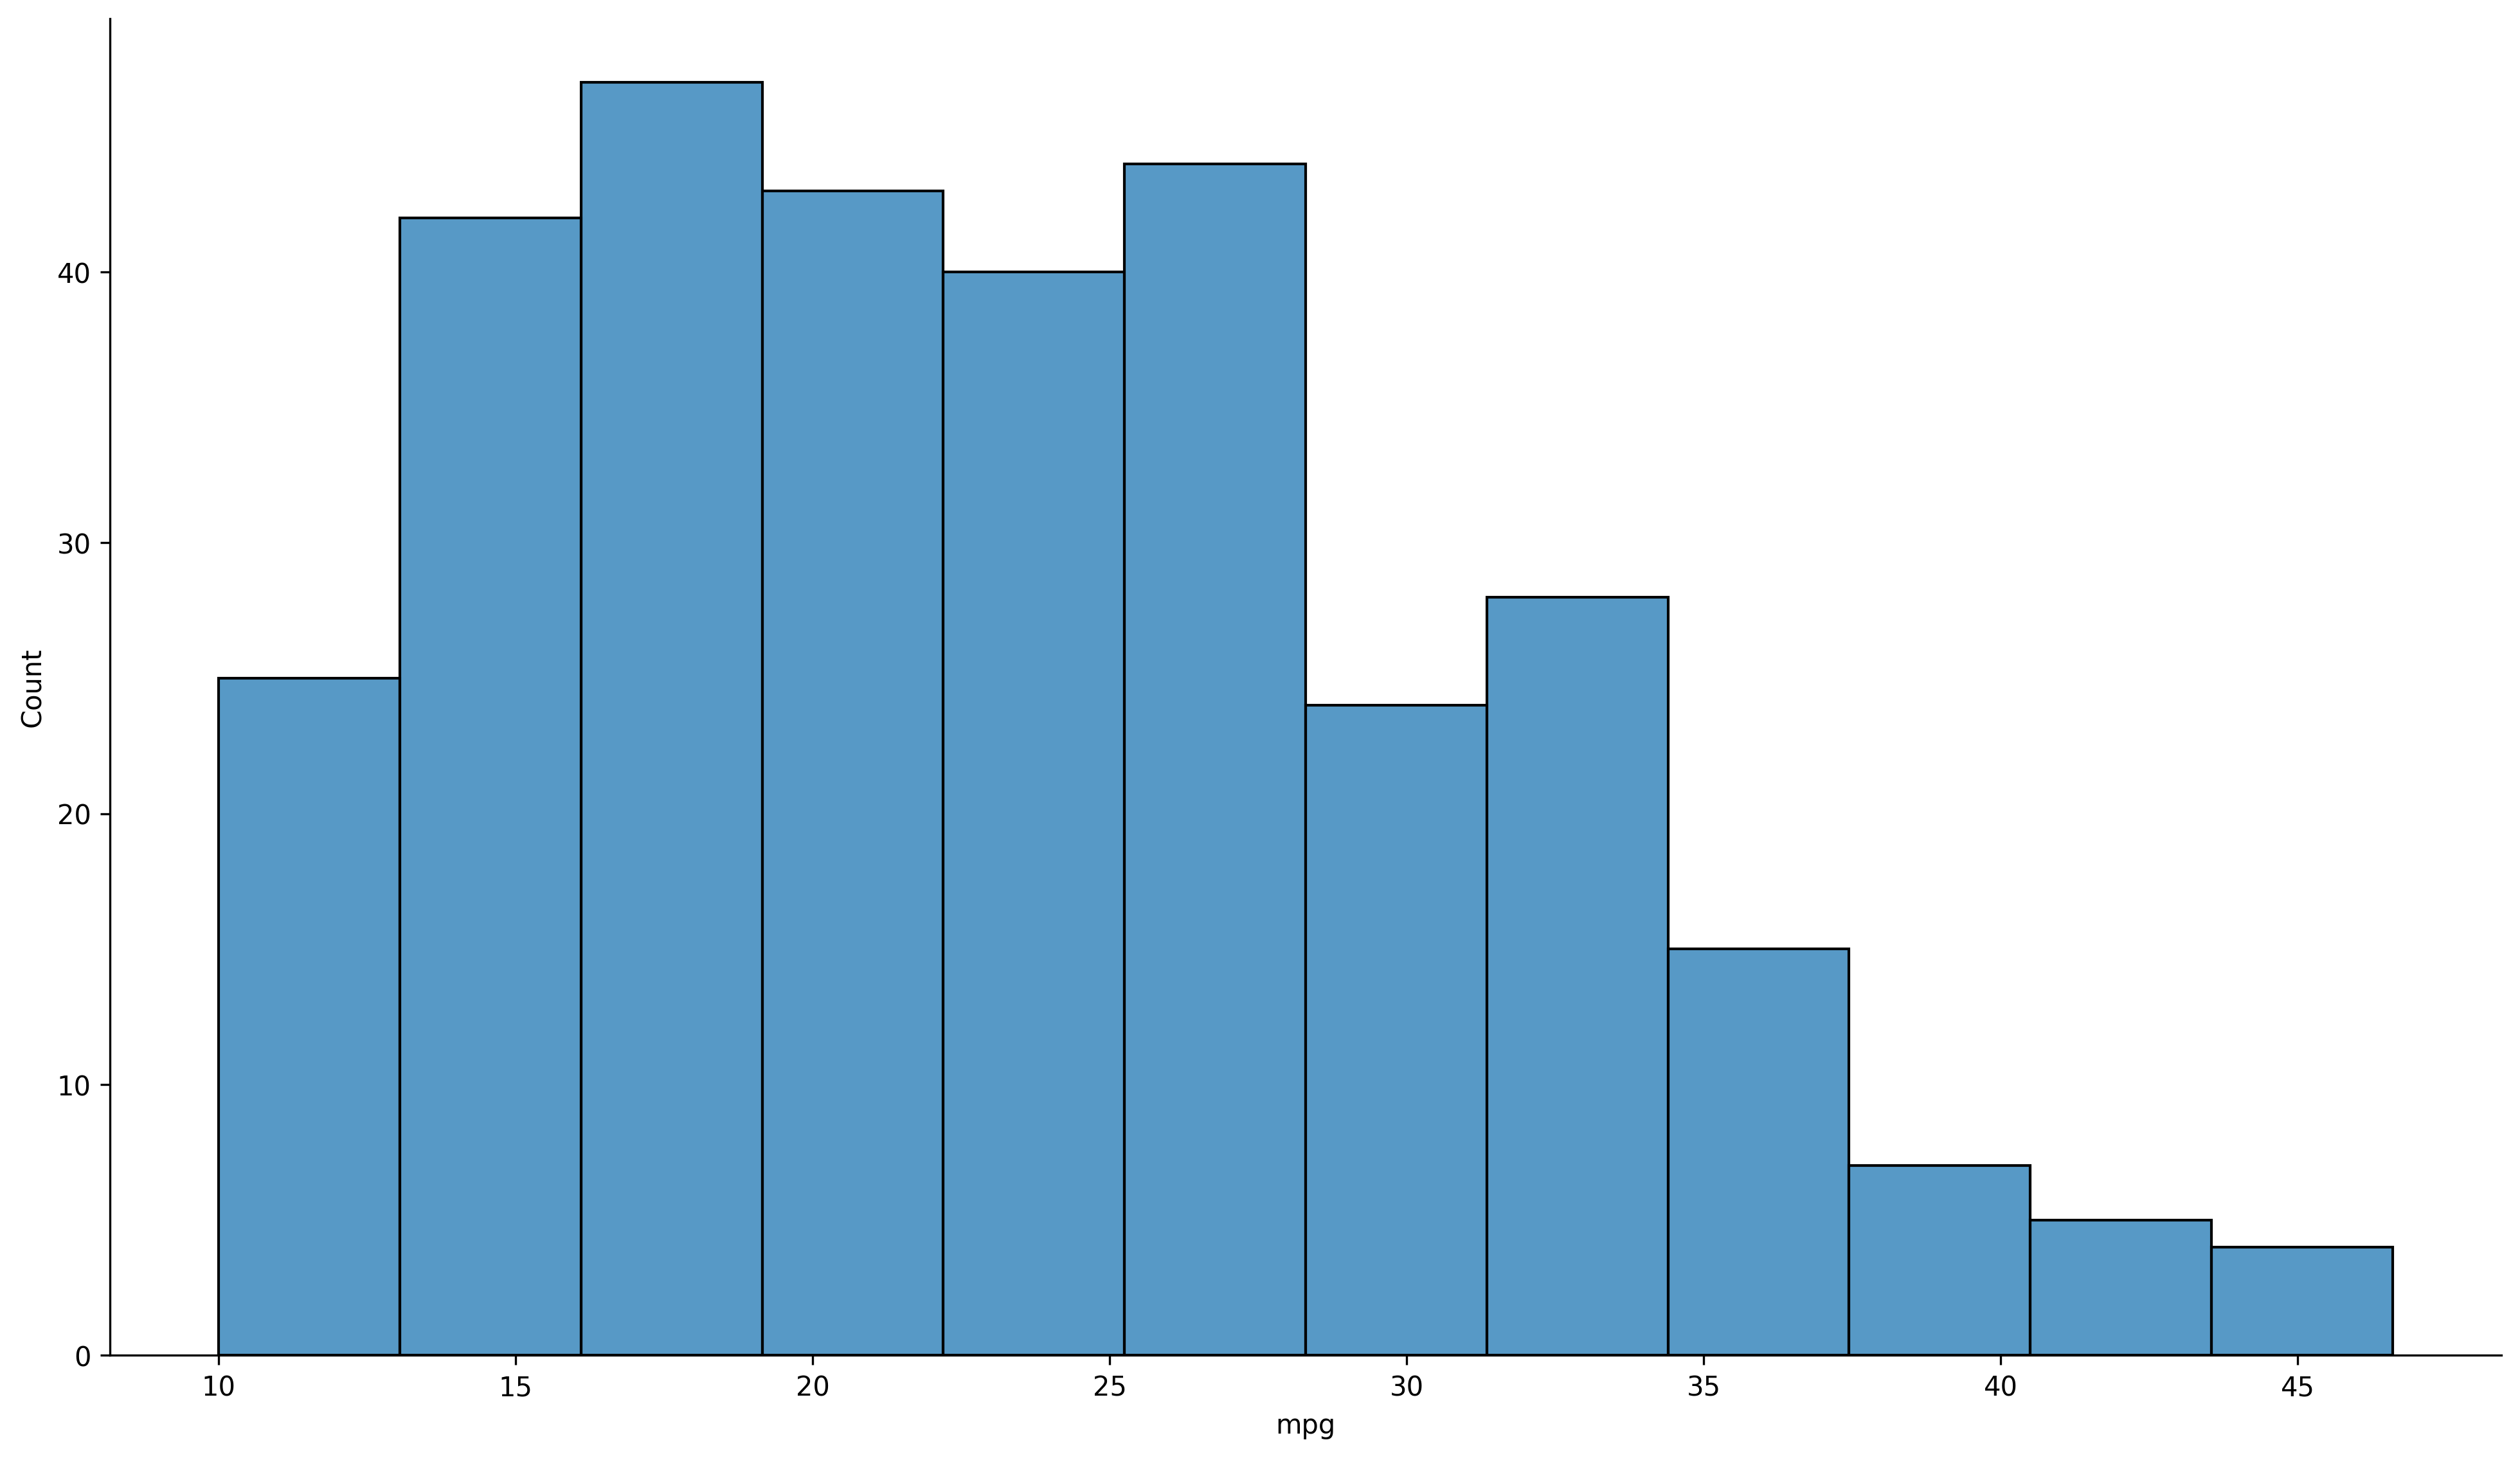

In [13]:
sns.histplot(df.mpg)

In [14]:
#. mpg değeri boş olanlar

df[ df.mpg.isnull() ].index

Index([  1,   7,   9,  11,  26,  28,  35,  44,  64,  69,  70,  94,  97, 104,
       108, 114, 123, 124, 131, 133, 139, 142, 144, 145, 148, 151, 154, 157,
       158, 161, 164, 165, 167, 173, 184, 192, 196, 202, 209, 218, 224, 233,
       237, 252, 254, 261, 263, 265, 272, 275, 279, 287, 288, 304, 310, 315,
       321, 327, 332, 344, 345, 346, 356, 360, 361, 371, 372, 374, 378, 385,
       387, 389, 396],
      dtype='int64')

In [15]:
df.weight.iloc[167]

np.float64(2171.0)

In [16]:
df.weight.std() * .5

428.9766197224217

In [17]:
df[ (df.weight <= df.weight.iloc[167] + df.weight.std() * .5) & (df.weight >= df.weight.iloc[167] - df.weight.std() * .5) ].mpg.mean()

np.float64(30.014414414414414)

#. Makine Öğrenimi Yöntemleri ile Eksik Verinin Kestirimi

##. Karar Ağaçları Modelleri'nin Kullanımı

In [18]:
#. Sci-kit learn modülünün kurulumu ve çalıştırılması
!pip install scikit-learn
#.   scikit-learn içerisindeki Tree alt modülünden Karar Ağaçları Modelinin Çağırılması
from sklearn.tree import DecisionTreeRegressor

In [19]:
#. Eksiksiz Veri Altkümesini Ayrıştırıyorum

df.dropna( how = 'any', axis = 0 )

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac
10,15.0,8.0,383.0,170.0,3563.0,10.0,70.0,1.0,dodge
21,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi
23,26.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0,bmw
24,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0,amc
...,...,...,...,...,...,...,...,...,...
354,34.5,4.0,100.0,79.0,2320.0,15.8,81.0,2.0,renault
364,26.6,8.0,350.0,105.0,3725.0,19.0,81.0,1.0,oldsmobile
368,27.0,4.0,112.0,88.0,2640.0,18.6,82.0,1.0,chevrolet
370,31.0,4.0,112.0,85.0,2575.0,16.2,82.0,1.0,pontiac


In [26]:
# #. Öğrenme Verisi
# #.   Elinizde az veri varsa 80/20 ya da 90/10 gibi oranlarda ayrıştırın
# #.   Rassal olarak %80 veriyi ayırma işi
# #.     np.random.choice() metodu ile elimizdeki indislerin rastgele %80 ini seçelim
# öğrenme_indisleri = \
# np.random.choice(
#                 df.dropna( how = 'any', axis = 0 ).index,
#                 size = int( len( df.dropna( how = 'any', axis = 0 ) )*.8 ),
#                 replace = False
#                 )

# df.loc[ öğrenme_indisleri ]

# #.     az önce seçmediğim kalan %20'yi ayrıştırıyorum
# test_indisleri = \
# [i for i in df.dropna( how = 'any', axis = 0 ).index if i not in öğrenme_indisleri ]

# df.loc[ test_indisleri ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
21,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi
57,24.0,4.0,113.0,95.0,2278.0,15.5,72.0,3.0,toyota
60,20.0,4.0,140.0,90.0,2408.0,19.5,72.0,1.0,chevrolet
79,26.0,4.0,96.0,69.0,2189.0,18.0,72.0,2.0,renault
81,28.0,4.0,97.0,92.0,2288.0,17.0,72.0,3.0,datsun
109,21.0,4.0,140.0,72.0,2401.0,19.5,73.0,1.0,chevrolet
115,15.0,8.0,350.0,145.0,4082.0,13.0,73.0,1.0,chevrolet
177,23.0,4.0,115.0,95.0,2694.0,15.0,75.0,2.0,audi
231,15.5,8.0,400.0,190.0,4325.0,12.2,77.0,1.0,chrysler
302,34.5,4.0,105.0,70.0,2150.0,14.9,79.0,1.0,plymouth


In [43]:
#. Make verisini sayısallaştırıyorum (etiketlere tam sayılı değerler veriyorum)

#. maxda diye yanlış yazılmış
df.replace( 'maxda', 'mazda', inplace = True )

df.make = [list(df.make.unique()).index( i ) for i in df.make]

In [44]:
#. Rastgele seçtiğim öğrenme ve test altkümelerini matris yapısına dönüştürüyorum
#.   Tahminleyiciler X ile, tahminlenenler y ile gösterilir...

X = df.dropna( how = 'any', axis = 0 ).values
#.   Bu yaptığım X'de tahminleyeceğim 'mpg' sütununa ait veri de var... olmamalıydı
X = df.dropna( how = 'any', axis = 0 ).iloc[:, 1:].values

#.   mpg sütunu verisini de y olarak tanımlayacağım
y = df.dropna( how = 'any', axis = 0 ).mpg.values

X, y

(array([[8.000e+00, 4.550e+02, 2.250e+02, 4.425e+03, 1.000e+01, 7.000e+01,
         1.000e+00, 5.000e+00],
        [8.000e+00, 3.830e+02, 1.700e+02, 3.563e+03, 1.000e+01, 7.000e+01,
         1.000e+00, 6.000e+00],
        [4.000e+00, 1.070e+02, 9.000e+01, 2.430e+03, 1.450e+01, 7.000e+01,
         2.000e+00, 1.100e+01],
        [4.000e+00, 1.210e+02, 1.130e+02, 2.234e+03, 1.250e+01, 7.000e+01,
         2.000e+00, 1.300e+01],
        [6.000e+00, 1.990e+02, 9.000e+01, 2.648e+03, 1.500e+01, 7.000e+01,
         1.000e+00, 3.000e+00],
        [8.000e+00, 4.000e+02, 1.700e+02, 4.746e+03, 1.200e+01, 7.100e+01,
         1.000e+00, 4.000e+00],
        [6.000e+00, 2.580e+02, 1.100e+02, 2.962e+03, 1.350e+01, 7.100e+01,
         1.000e+00, 3.000e+00],
        [4.000e+00, 1.400e+02, 7.200e+01, 2.408e+03, 1.900e+01, 7.100e+01,
         1.000e+00, 0.000e+00],
        [6.000e+00, 2.500e+02, 1.000e+02, 3.282e+03, 1.500e+01, 7.100e+01,
         1.000e+00, 5.000e+00],
        [4.000e+00, 7.100e+01, 6.500e

In [45]:
# #.   Bu yaptığım X'de tahminleyeceğim 'mpg' sütununa ait veri de var... olmamalıydı
# X_öğrenme = df.dropna( how = 'any', axis = 0 ).loc[öğrenme_indisleri].iloc[:,1:].values

# #.   mpg sütunu verisini de y olarak tanımlayacağım
# y_öğrenme = df.dropna( how = 'any', axis = 0 ).loc[öğrenme_indisleri].mpg.values

# #.   Bu yaptığım X'de tahminleyeceğim 'mpg' sütununa ait veri de var... olmamalıydı
# X_test = df.dropna( how = 'any', axis = 0 ).loc[test_indisleri].iloc[:,1:].values

# #.   mpg sütunu verisini de y olarak tanımlayacağım
# y_test = df.dropna( how = 'any', axis = 0 ).loc[test_indisleri].mpg.values

In [46]:
#. Daha kolay yöntem ile öğrenme ve test kümelerini oluşturuyorum
from sklearn.model_selection import train_test_split

X_öğrenme, X_test, y_öğrenme, y_test = train_test_split(X, y, test_size = .2)

In [47]:
#. Karar Ağacı Modelimi Oluşturup Öğrenmesini Sağlıyorum

#.   Model nesnesini tanımlıyorum
model = DecisionTreeRegressor().fit( X_öğrenme, y_öğrenme )

#.   Öğrenme Kümesi Performansı Nasıl?
model.predict( X_öğrenme )

array([29.5, 34.1, 15.5, 28. , 29.9, 15.5, 25. , 16. , 24. , 13. , 43.4,
       18.5, 17.5, 21. , 26.6, 19.4, 16.5, 28. , 26. , 26. , 23.9, 35.7,
       30. , 13. , 15.5, 28.4, 31.9, 18. , 34.5, 22. , 29.8, 24. , 21. ,
       22. , 19. , 18. , 35. , 14. , 31. , 31. , 15. , 36. , 23. , 21.5,
       12. , 19. , 26. , 21. , 24. , 17. , 16.9, 16.5])

In [48]:
y_öğrenme

array([29.5, 34.1, 15.5, 28. , 29.9, 15.5, 25. , 16. , 24. , 13. , 43.4,
       18.5, 17.5, 21. , 26.6, 19.4, 16.5, 28. , 26. , 26. , 23.9, 35.7,
       30. , 13. , 15.5, 28.4, 31.9, 18. , 34.5, 22. , 29.8, 24. , 21. ,
       22. , 19. , 18. , 35. , 14. , 31. , 31. , 15. , 36. , 23. , 21.5,
       12. , 19. , 26. , 21. , 24. , 17. , 16.9, 16.5])

<Axes: >

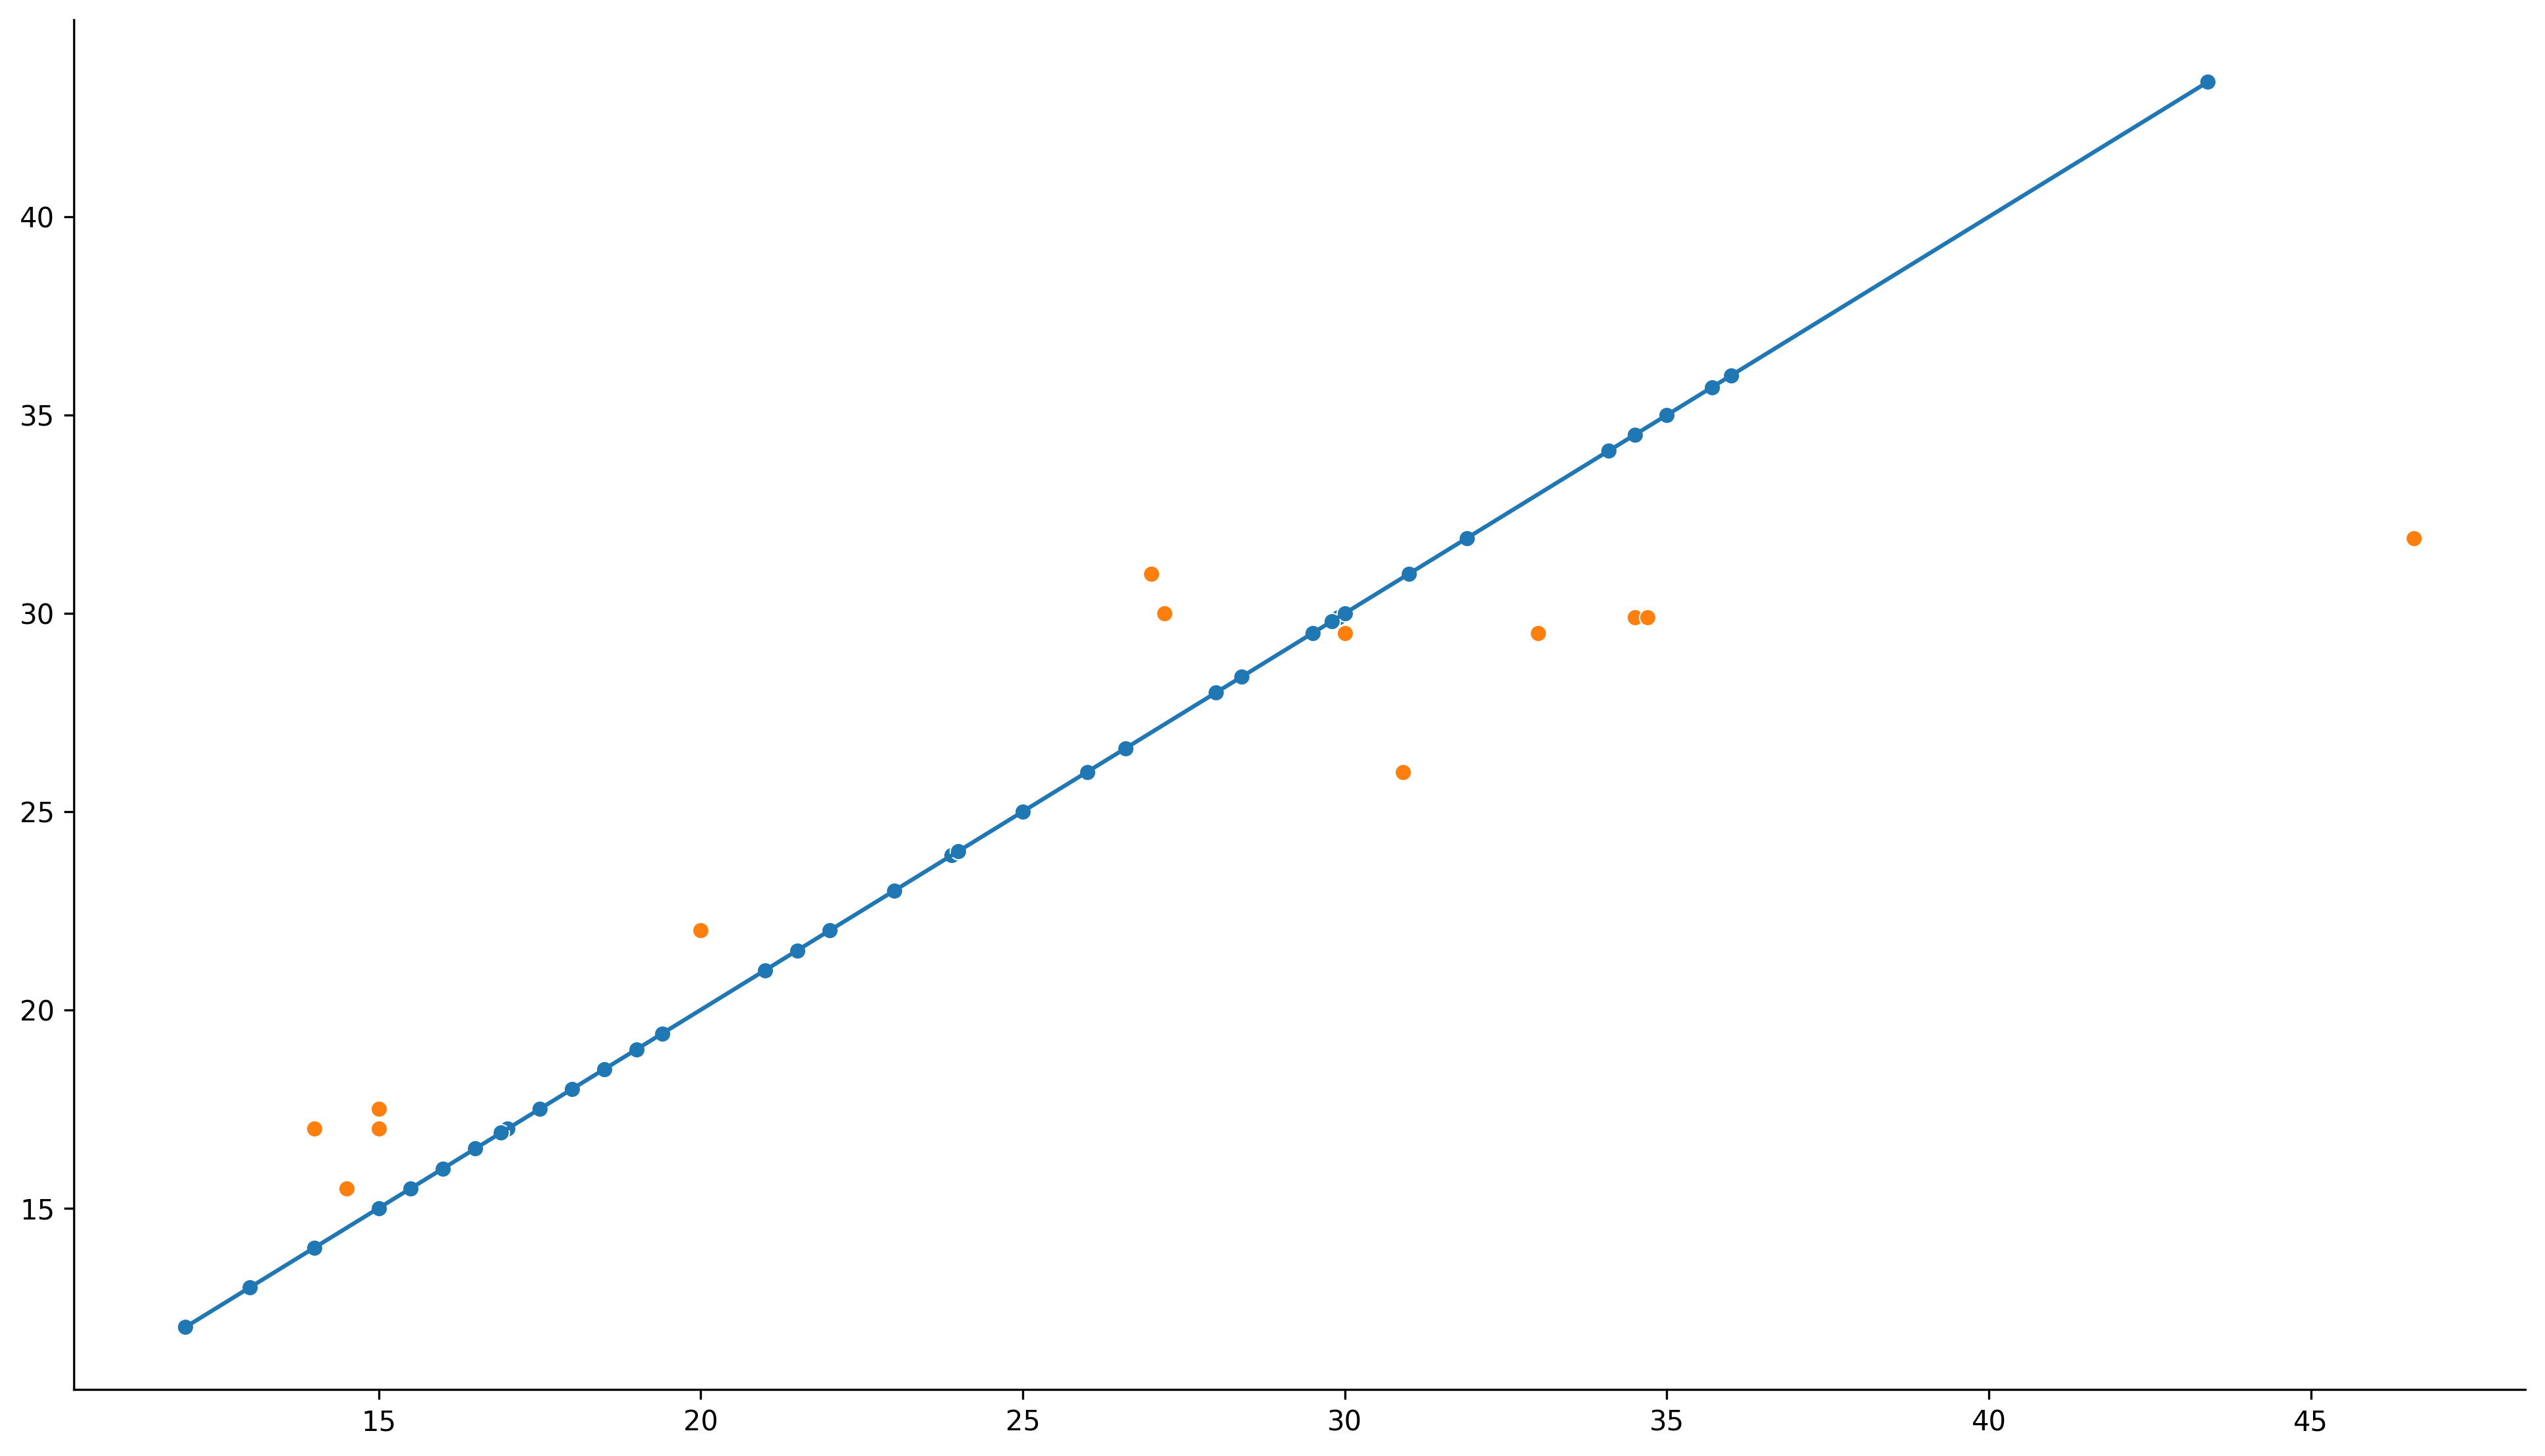

In [51]:
#. Görsel ile anlama
#.   45 derece açılı x = y doğrusunu çiziyorum; bu mutlak doğruluğu gösteriyor
sns.lineplot(
            x = y_öğrenme,
            y = y_öğrenme
            )
#.   tahminlerim ile gerçek değerleri karşılaştırıyorum
sns.scatterplot(
                x = y_öğrenme,
                y = model.predict( X_öğrenme )
                )

#.   tahminlerim ile gerçek değerleri karşılaştırıyorum
sns.scatterplot(
                x = y_test,
                y = model.predict( X_test )
                )

##.  Rassal Orman Modeli ile Tahminleme

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit( X_öğrenme, y_öğrenme )

#.   Öğrenme Kümesi Performansı Nasıl?
model.predict( X_öğrenme )

array([28.566, 33.884, 16.139, 26.64 , 30.821, 16.135, 25.729, 15.762,
       24.41 , 13.038, 39.68 , 18.303, 17.951, 21.98 , 23.788, 20.55 ,
       17.217, 26.727, 26.536, 24.91 , 24.144, 33.941, 31.051, 13.06 ,
       15.624, 27.122, 33.106, 19.084, 34.255, 22.38 , 30.163, 23.38 ,
       21.077, 20.75 , 21.9  , 18.185, 33.324, 14.329, 31.091, 28.415,
       15.539, 34.536, 23.317, 22.742, 12.943, 19.041, 26.221, 22.533,
       24.34 , 16.532, 16.878, 16.185])

In [53]:
y_öğrenme

array([29.5, 34.1, 15.5, 28. , 29.9, 15.5, 25. , 16. , 24. , 13. , 43.4,
       18.5, 17.5, 21. , 26.6, 19.4, 16.5, 28. , 26. , 26. , 23.9, 35.7,
       30. , 13. , 15.5, 28.4, 31.9, 18. , 34.5, 22. , 29.8, 24. , 21. ,
       22. , 19. , 18. , 35. , 14. , 31. , 31. , 15. , 36. , 23. , 21.5,
       12. , 19. , 26. , 21. , 24. , 17. , 16.9, 16.5])

<Axes: >

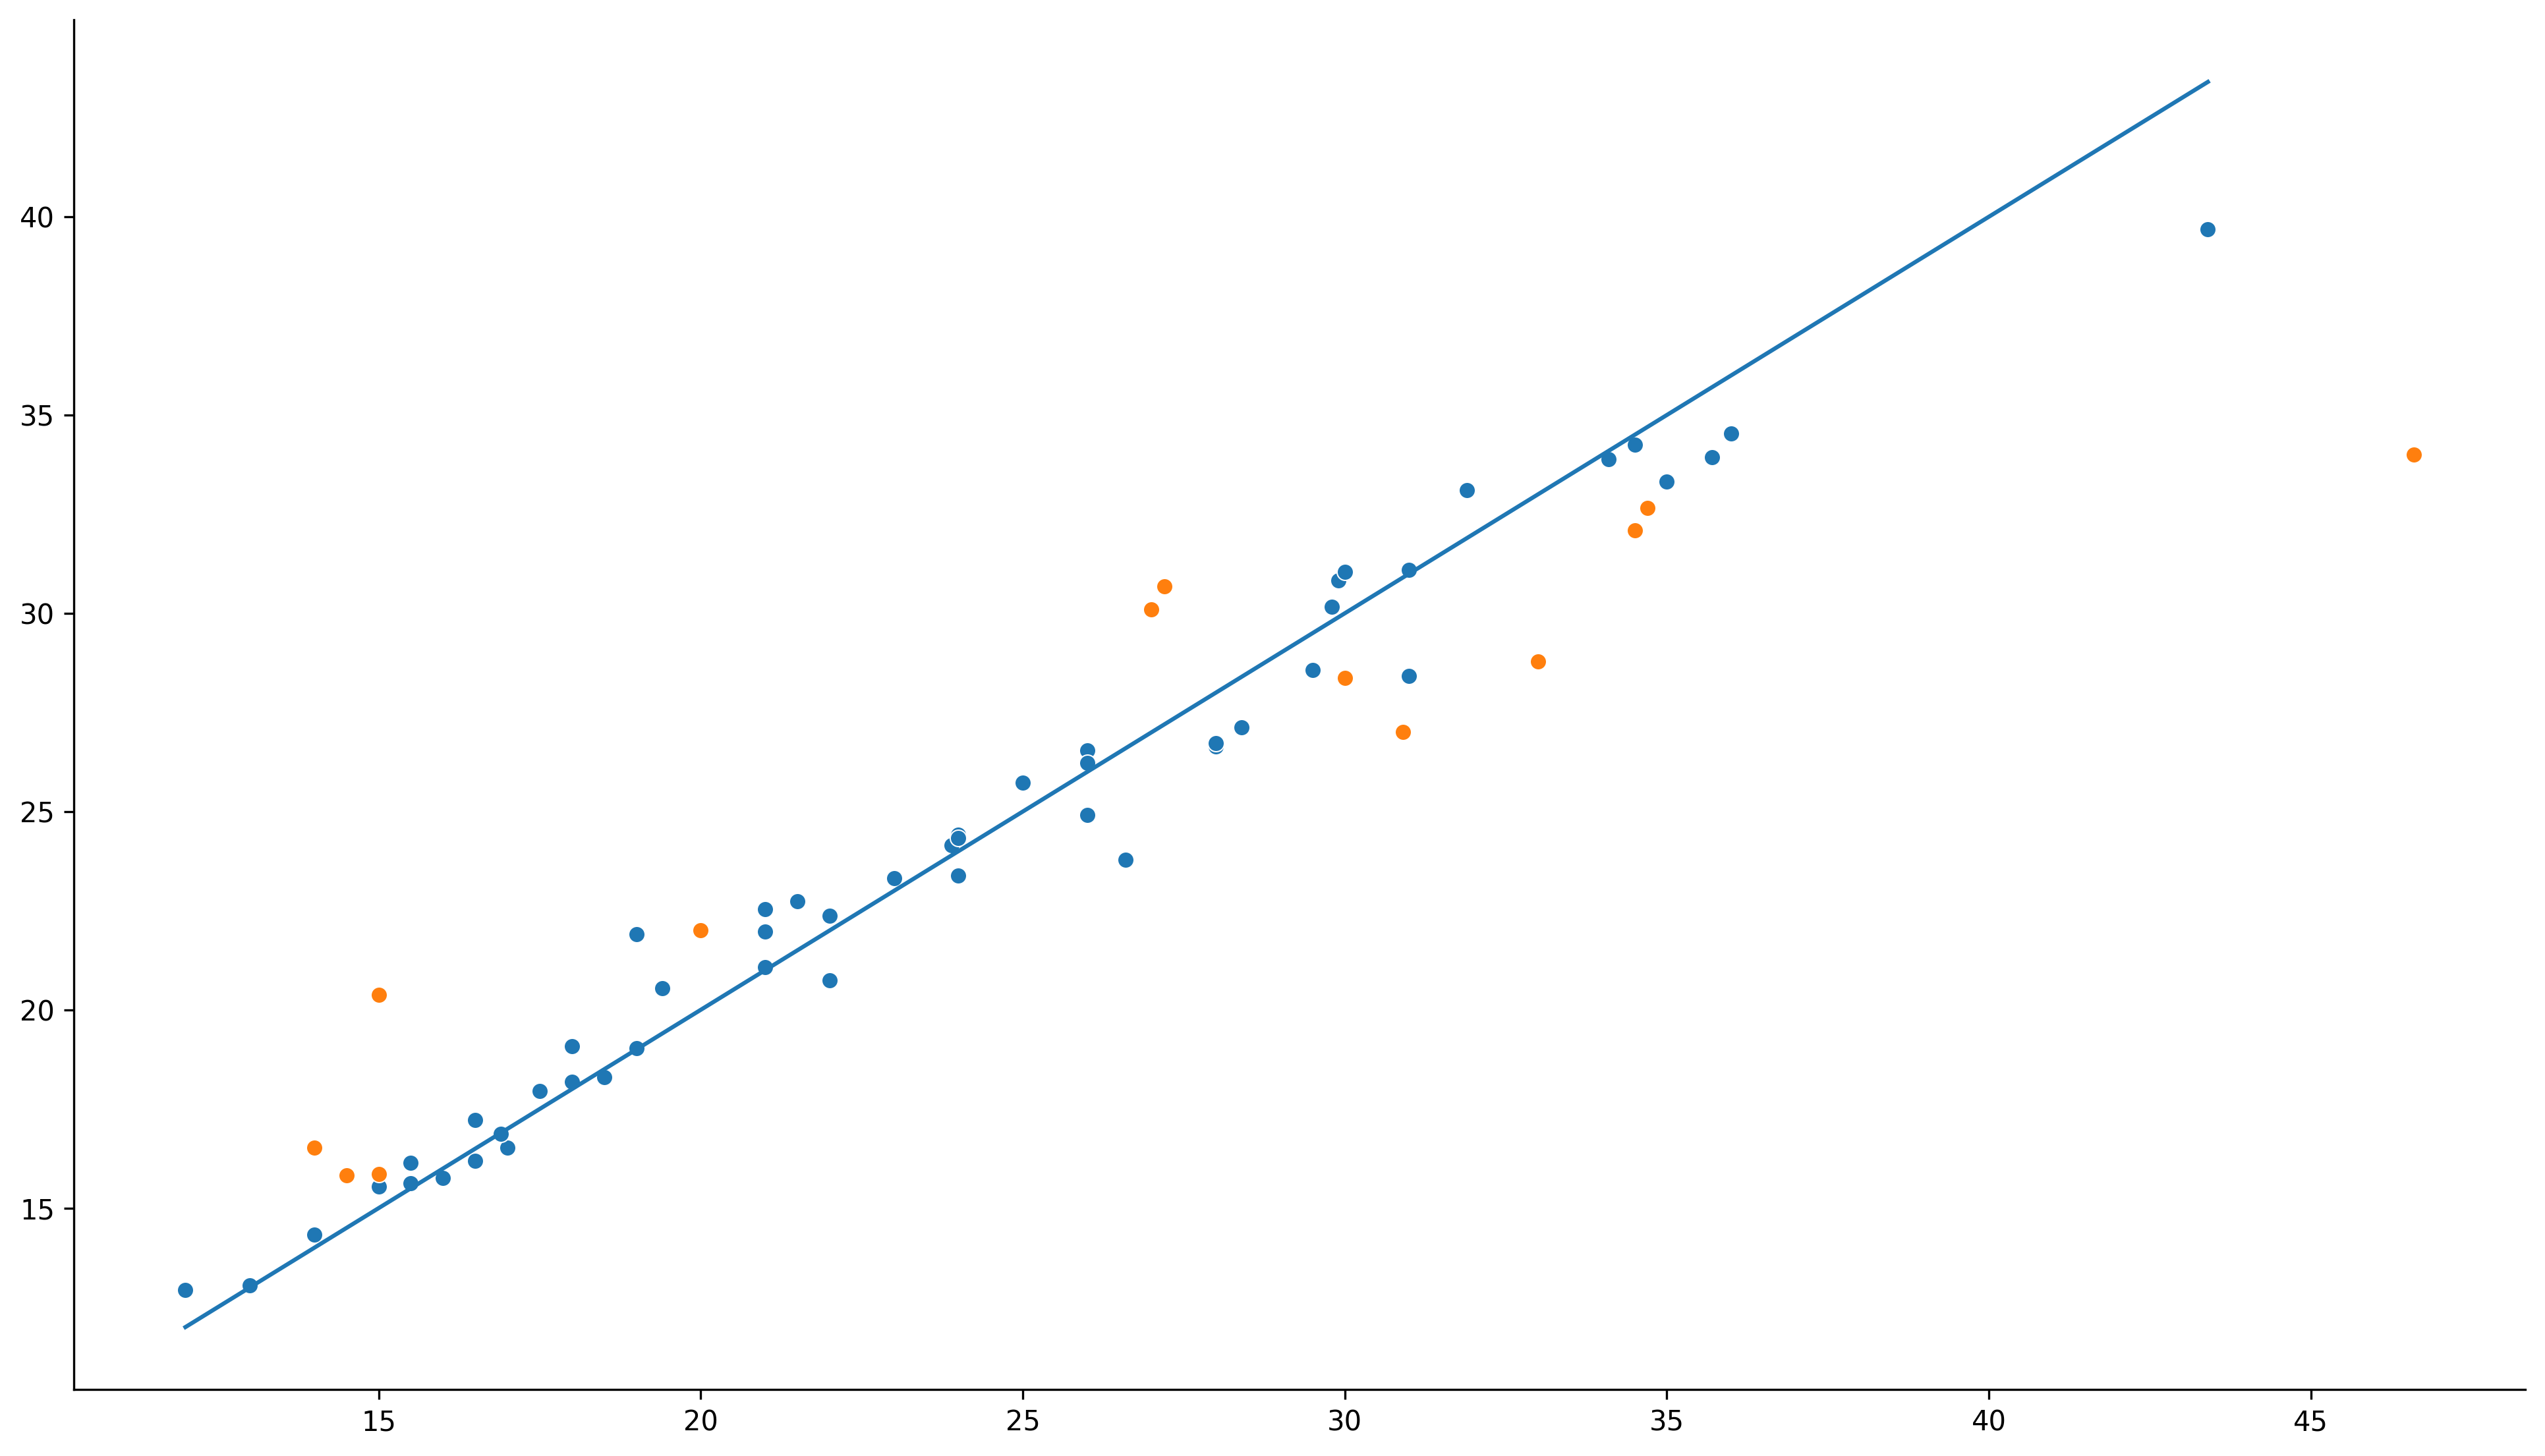

In [54]:
#. Görsel ile anlama
#.   45 derece açılı x = y doğrusunu çiziyorum; bu mutlak doğruluğu gösteriyor
sns.lineplot(
            x = y_öğrenme,
            y = y_öğrenme
            )
#.   tahminlerim ile gerçek değerleri karşılaştırıyorum
sns.scatterplot(
                x = y_öğrenme,
                y = model.predict( X_öğrenme )
                )

#.   tahminlerim ile gerçek değerleri karşılaştırıyorum
sns.scatterplot(
                x = y_test,
                y = model.predict( X_test )
                )

In [69]:
#. mpg eksikverisini tamamlama

#.   df'nin X kısmı içerisinde eksiği olmayan satır numaralarını süzdük
tam_indisler = df.iloc[:,1:].dropna( how = 'any', axis = 0 ).index

#.   Bu satır numaralarında mpg verisi eksik olanları ve tam olanları belirledim
tam_X = df.loc[ tam_indisler ].mpg.isna()

#.   X'i tam mpg verisi eksik olan veri kümesini filtreledik
df.loc[ df.iloc[:,1:].dropna( how = 'any', axis = 0 ).index ][
tam_X
]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
7,NaN,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,2
28,NaN,8.0,304.0,193.0,4732.0,18.5,70.0,1.0,14
158,NaN,8.0,318.0,150.0,4498.0,14.5,75.0,1.0,2
196,NaN,4.0,98.0,60.0,2164.0,22.1,76.0,1.0,0
202,NaN,6.0,258.0,95.0,3193.0,17.8,76.0,1.0,3
233,NaN,4.0,97.0,78.0,1940.0,14.5,77.0,2.0,9
254,NaN,6.0,200.0,85.0,2965.0,15.8,78.0,1.0,4
261,NaN,6.0,258.0,120.0,3410.0,15.1,78.0,1.0,3
321,NaN,4.0,108.0,75.0,2265.0,15.2,80.0,3.0,7


In [70]:
X_yeni = df.loc[ df.iloc[:,1:].dropna( how = 'any', axis = 0 ).index ][
                                                                      tam_X
                                                                      ].iloc[:,1:].values

model.predict( X_yeni )

array([16.302, 15.333, 13.437, 13.373, 26.76 , 19.591, 28.416, 21.687,
       17.092, 33.952, 33.933, 33.725, 33.633, 33.809])

In [75]:
df.loc[ df.iloc[:,1:].dropna( how = 'any', axis = 0 ).index ][
tam_X
].mpg = model.predict( X_yeni )

df[ (df.mpg.isna()) & (df.cylinders.isna()) ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
35,NaN,NaN,250.0,NaN,3329.0,15.5,71.0,1.0,0
44,NaN,NaN,400.0,NaN,5140.0,12.0,71.0,1.0,5
108,NaN,NaN,NaN,NaN,2279.0,19.0,NaN,3.0,7
123,NaN,NaN,NaN,122.0,2807.0,13.5,73.0,3.0,7
124,NaN,NaN,350.0,180.0,NaN,11.0,73.0,1.0,18
133,NaN,NaN,250.0,NaN,3781.0,17.0,74.0,1.0,0
144,NaN,NaN,NaN,52.0,1649.0,NaN,74.0,3.0,7
145,NaN,NaN,83.0,61.0,2003.0,19.0,74.0,3.0,8
148,NaN,NaN,116.0,75.0,2246.0,14.0,74.0,NaN,17
173,NaN,NaN,119.0,97.0,2545.0,17.0,75.0,3.0,8
